In [2]:
!pip install tensorflow

In [3]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Set the path to the dataset folder


Mounted at /content/drive


Loading Dataset with visualizing fuelrate as a function of speed and NO

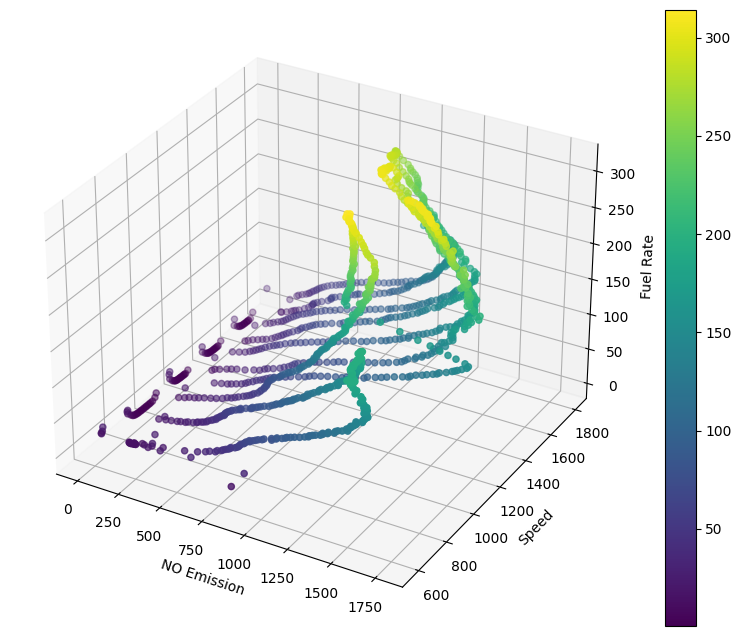

In [4]:
import scipy.io
import matplotlib.pyplot as plt

# Load the MATLAB data file
mat_data = scipy.io.loadmat('/content/drive/MyDrive/Ex1.mat')

# Extract data from the loaded file
fuelrate = mat_data['fuelrate'].flatten()
NOemission = mat_data['NOemission'].flatten()
speed = mat_data['speed'].flatten()

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
p=ax.scatter(NOemission, speed, fuelrate, c=fuelrate,cmap='viridis', marker='o')

# Set labels
ax.set_xlabel('NO Emission')
ax.set_ylabel('Speed')
ax.set_zlabel('Fuel Rate')
fig.colorbar(p, ax=ax)

# Show the plot
plt.show()



# Create a scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(NOemission, speed, c=fuelrate, cmap='viridis', marker='o', alpha=0.8)
# plt.colorbar(label='Fuel Rate')
# plt.xlabel('NO Emission')
# plt.ylabel('Speed')
# plt.title('Fuel Rate as a function of NO Emission and Speed')
# plt.grid(True)
# plt.show()

Train and test spliting

In [5]:
from sklearn.model_selection import train_test_split

# Combine input features into one array
X = list(zip(NOemission, speed))

#Extract first 700 samples for training and the rest for validation
X_train, X_valid, fuelrate_train, fuelrate_valid = train_test_split(
    X[:700], fuelrate[:700], test_size=499, random_state=42
)


# Convert back to individual vectors
NOemission_train, speed_train = zip(*X_train)
NOemission_valid, speed_valid = zip(*X_valid)


Linear regression Model

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a linear regression model
model = LinearRegression()

# Reshape the data to meet the input requirements of the model
X_train_reshaped = [[no, speed] for no, speed in zip(NOemission_train, speed_train)]
X_valid_reshaped = [[no, speed] for no, speed in zip(NOemission_valid, speed_valid)]

# Fit the model on the training data
model.fit(X_train_reshaped, fuelrate_train)

# Make predictions on the training data
train_predictions = model.predict(X_train_reshaped)

# Make predictions on the validation data
valid_predictions = model.predict(X_valid_reshaped)

# Compute mean squared error for both training and validation sets
mse_train = mean_squared_error(fuelrate_train, train_predictions)
mse_valid = mean_squared_error(fuelrate_valid, valid_predictions)

print("Mean Squared Error on Training Data:", mse_train)
print("Mean Squared Error on Validation Data:", mse_valid)


Mean Squared Error on Training Data: 3229.105879776237
Mean Squared Error on Validation Data: 3582.317695935172


MLP neural network

In [7]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Combine input features into one array
X = np.array(list(zip(NOemission, speed)))

# Split the data into training and validation sets
X_train_mlp, X_valid_mlp, fuelrate_train_mlp, fuelrate_valid_mlp = train_test_split(
    X, fuelrate, test_size=0.4, random_state=42
)

# Build the MLP model
def build_mlp_model(hidden_units):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(hidden_units, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the MLP model with different numbers of neurons in the hidden layer
best_mse = float('inf')
best_hidden_units = 0

for hidden_units in range(1, 50):
    model = build_mlp_model(hidden_units)
    model.fit(X_train_mlp, fuelrate_train_mlp, epochs=50, verbose=0)

    # Evaluate the model on the validation set
    predictions_valid = model.predict(X_valid_mlp)
    mse_valid = mean_squared_error(fuelrate_valid_mlp, predictions_valid)

    print(f"Hidden Units: {hidden_units}, MSE on Validation Data: {mse_valid}")

    # Update the best model if the current one has a lower MSE
    if mse_valid < best_mse:
        best_mse = mse_valid
        best_hidden_units = hidden_units

# Train the best model on the entire training set
best_model = build_mlp_model(best_hidden_units)
best_model.fit(X_train_mlp, fuelrate_train_mlp, epochs=50, verbose=1)

# Make predictions on the entire dataset
predictions_train = best_model.predict(X_train_mlp)
predictions_validation = best_model.predict(X_valid_mlp)

# Compute mean squared error on the entire dataset
mse = mean_squared_error(fuelrate_train_mlp, predictions_train)
print(f"Best Hidden Units: {best_hidden_units}, MSE on Train Dataset: {mse}")


mse = mean_squared_error(fuelrate_valid_mlp, predictions_validation)
print(f"Best Hidden Units: {best_hidden_units}, MSE on Validation Dataset: {mse}")


15/15 [==============================] - 0s 2ms/step
Hidden Units: 1, MSE on Validation Data: 30085.292149793415
15/15 [==============================] - 0s 2ms/step
Hidden Units: 2, MSE on Validation Data: 5369.016083640093
15/15 [==============================] - 0s 2ms/step
Hidden Units: 3, MSE on Validation Data: 32093.394912152093
15/15 [==============================] - 0s 6ms/step
Hidden Units: 4, MSE on Validation Data: 3959.4824696158594
15/15 [==============================] - 0s 3ms/step
Hidden Units: 5, MSE on Validation Data: 67818.23823194782
15/15 [==============================] - 0s 5ms/step
Hidden Units: 6, MSE on Validation Data: 3907.686430124564
15/15 [==============================] - 0s 8ms/step
Hidden Units: 7, MSE on Validation Data: 5190.002059216844
15/15 [==============================] - 0s 2ms/step
Hidden Units: 8, MSE on Validation Data: 3680.456620008515
15/15 [==============================] - 0s 3ms/step
Hidden Units: 9, MSE on Validation Data: 3978.27

In [9]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Combine input features into one array
X = np.array(list(zip(NOemission, speed)))

# Split the data into training and validation sets
X_train_mlp, X_valid_mlp, fuelrate_train_mlp, fuelrate_valid_mlp = train_test_split(
    X, fuelrate, test_size=0.4, random_state=42
)

# Build the MLP model
def build_mlp_model(hidden_layers, hidden_units, learning_rate):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(2,)))

    for _ in range(hidden_layers):
        model.add(tf.keras.layers.Dense(hidden_units, activation='relu'))

    model.add(tf.keras.layers.Dense(1))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Hyperparameter search space
hidden_layers_list = [1, 2, 3]
hidden_units_list = [16, 32, 64]
learning_rates_list = [0.001, 0.01, 0.1]

best_mse = float('inf')
best_hyperparameters = None

# Hyperparameter search
for hidden_layers in hidden_layers_list:
    for hidden_units in hidden_units_list:
        for learning_rate in learning_rates_list:
            model = build_mlp_model(hidden_layers, hidden_units, learning_rate)
            model.fit(X_train_mlp, fuelrate_train_mlp, epochs=50, verbose=0)

            # Evaluate the model on the validation set
            predictions_valid = model.predict(X_valid_mlp)
            mse_valid = mean_squared_error(fuelrate_valid_mlp, predictions_valid)

            print(f"Hidden Layers: {hidden_layers}, Hidden Units: {hidden_units}, Learning Rate: {learning_rate}, MSE on Validation Data: {mse_valid}")

            # Update the best model if the current one has a lower MSE
            if mse_valid < best_mse:
                best_mse = mse_valid
                best_hyperparameters = (hidden_layers, hidden_units, learning_rate)

# Train the best model on the entire training set
best_model = build_mlp_model(*best_hyperparameters)
best_model.fit(X_train_mlp, fuelrate_train_mlp, epochs=50, verbose=1)

# Make predictions on the entire dataset
predictions_train = best_model.predict(X_train_mlp)
predictions_validation = best_model.predict(X_valid_mlp)

# Compute mean squared error on the entire dataset
mse_train = mean_squared_error(fuelrate_train_mlp, predictions_train)
mse_valid = mean_squared_error(fuelrate_valid_mlp, predictions_validation)

print(f"Best Hyperparameters: {best_hyperparameters}, MSE on Train Dataset: {mse_train}")
print(f"Best Hyperparameters: {best_hyperparameters}, MSE on Validation Dataset: {mse_valid}")


15/15 [==============================] - 0s 2ms/step
Hidden Layers: 1, Hidden Units: 16, Learning Rate: 0.001, MSE on Validation Data: 3700.452061711693
15/15 [==============================] - 0s 2ms/step
Hidden Layers: 1, Hidden Units: 16, Learning Rate: 0.01, MSE on Validation Data: 4004.9604819003366
15/15 [==============================] - 0s 3ms/step
Hidden Layers: 1, Hidden Units: 16, Learning Rate: 0.1, MSE on Validation Data: 5115.797515626281
15/15 [==============================] - 0s 2ms/step
Hidden Layers: 1, Hidden Units: 32, Learning Rate: 0.001, MSE on Validation Data: 3866.6432135765567
15/15 [==============================] - 0s 2ms/step
Hidden Layers: 1, Hidden Units: 32, Learning Rate: 0.01, MSE on Validation Data: 3747.494302813456
15/15 [==============================] - 0s 2ms/step
Hidden Layers: 1, Hidden Units: 32, Learning Rate: 0.1, MSE on Validation Data: 4316.349948163284
15/15 [==============================] - 0s 3ms/step
Hidden Layers: 1, Hidden Units: 6

15/15 [==============================] - 0s 2ms/step
Hidden Units: 1, MSE on Validation Data: 27847.037487949758
15/15 [==============================] - 0s 2ms/step
Hidden Units: 2, MSE on Validation Data: 68947.412798346
15/15 [==============================] - 0s 2ms/step
Hidden Units: 3, MSE on Validation Data: 4249.347322877806
15/15 [==============================] - 0s 2ms/step
Hidden Units: 4, MSE on Validation Data: 16110.295839535938
15/15 [==============================] - 0s 2ms/step
Hidden Units: 5, MSE on Validation Data: 37786.550133764664
15/15 [==============================] - 0s 2ms/step
Hidden Units: 6, MSE on Validation Data: 3802.911660909943
15/15 [==============================] - 0s 2ms/step
Hidden Units: 7, MSE on Validation Data: 6707.906792121581
15/15 [==============================] - 0s 3ms/step
Hidden Units: 8, MSE on Validation Data: 4030.486316539186
15/15 [==============================] - 0s 2ms/step
Hidden Units: 9, MSE on Validation Data: 3935.9651

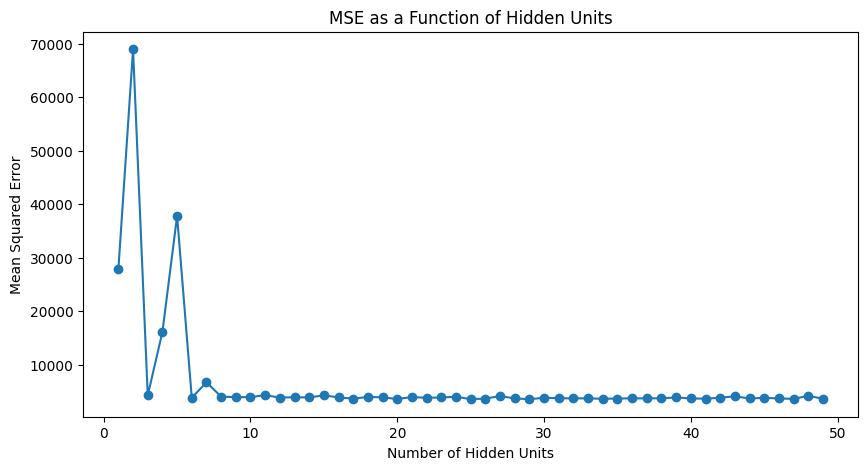

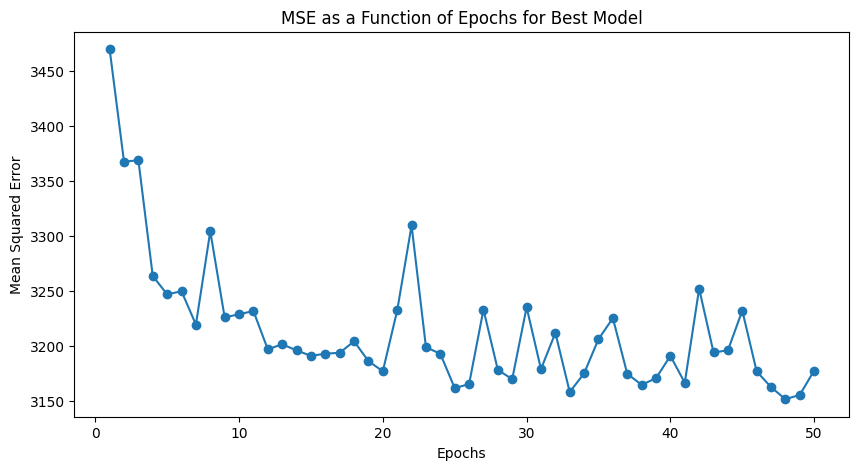

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Combine input features into one array
X = np.array(list(zip(NOemission, speed)))

# Split the data into training and validation sets
X_train_mlp, X_valid_mlp, fuelrate_train_mlp, fuelrate_valid_mlp = train_test_split(
    X, fuelrate, test_size=0.4, random_state=42
)

# Build the MLP model
def build_mlp_model(hidden_units):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(hidden_units, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Lists to store MSE values for plotting
mse_values_hidden_units = []
mse_values_epochs = []

# Train the MLP model with different numbers of neurons in the hidden layer
best_mse = float('inf')
best_hidden_units = 0

for hidden_units in range(1, 50):
    model = build_mlp_model(hidden_units)
    history = model.fit(X_train_mlp, fuelrate_train_mlp, epochs=50, verbose=0)

    # Evaluate the model on the validation set
    predictions_valid = model.predict(X_valid_mlp)
    mse_valid = mean_squared_error(fuelrate_valid_mlp, predictions_valid)
    mse_values_hidden_units.append(mse_valid)

    print(f"Hidden Units: {hidden_units}, MSE on Validation Data: {mse_valid}")

    # Update the best model if the current one has a lower MSE
    if mse_valid < best_mse:
        best_mse = mse_valid
        best_hidden_units = hidden_units

# Train the best model on the entire training set
best_model = build_mlp_model(best_hidden_units)
history_best = best_model.fit(X_train_mlp, fuelrate_train_mlp, epochs=50, verbose=1)

# Make predictions on the entire dataset
predictions_train = best_model.predict(X_train_mlp)
predictions_validation = best_model.predict(X_valid_mlp)

# Compute mean squared error on the entire dataset
mse_train = mean_squared_error(fuelrate_train_mlp, predictions_train)
print(f"Best Hidden Units: {best_hidden_units}, MSE on Train Dataset: {mse_train}")

mse_valid = mean_squared_error(fuelrate_valid_mlp, predictions_validation)
print(f"Best Hidden Units: {best_hidden_units}, MSE on Validation Dataset: {mse_valid}")

# Plot MSE as a function of hidden units
plt.figure(figsize=(10, 5))
plt.plot(range(1, 50), mse_values_hidden_units, marker='o')
plt.title('MSE as a Function of Hidden Units')
plt.xlabel('Number of Hidden Units')
plt.ylabel('Mean Squared Error')
plt.show()

# Plot MSE as a function of epochs for the best model
plt.figure(figsize=(10, 5))
plt.plot(range(1, 51), history_best.history['loss'], marker='o')
plt.title('MSE as a Function of Epochs for Best Model')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()


Logistic regression model

In [8]:
import numpy as np
from sklearn.metrics import mean_squared_error


fuelrate = mat_data['fuelrate'].flatten()
NOemission = mat_data['NOemission'].flatten()
speed = mat_data['speed'].flatten()


NOemission_train=NOemission[:700]
NOemission_valid=NOemission[700:]

speed_train=speed[:700]
speed_valid=speed[700:]

fuelrate_train=fuelrate[:700]
fuelrate_valid=fuelrate[700:]



# Calculate logistic transformation of fuel rate
Y = np.max(fuelrate_train) + 1
fuelrate_train_logistic = np.log((Y - fuelrate_train) / fuelrate_train)
fuelrate_valid_logistic = np.log((Y - fuelrate_valid) / fuelrate_valid)

# Calculate necessary summations
sigmax = np.sum(NOemission_train)
sigmax2 = 790153515
sigmay = np.sum(speed_train)
sigmay2 = np.sum(speed_train**2)
sigmaxy = np.sum(NOemission_train * speed_train)
sigmaz = np.sum(fuelrate_train_logistic)
sigmazx = np.sum(fuelrate_train_logistic * NOemission_train)
sigmazy = np.sum(fuelrate_train_logistic * speed_train)

# Construct matrix A and vector B
A = np.array([[len(fuelrate_train), sigmax, sigmay],
              [sigmax, sigmax2, sigmaxy],
              [sigmay, sigmaxy, sigmay2]])

B = np.array([sigmaz, sigmazx, sigmazy])

print(A)
print(B)
# Solve for coefficients using matrix inversion
w_logistic = np.linalg.inv(A).dot(B)

# Calculate predicted values for training and validation sets
Y_train_pred = Y / (1 + np.exp(w_logistic[0] + w_logistic[1] * NOemission_train + w_logistic[2] * speed_train))
Y_valid_pred = Y / (1 + np.exp(w_logistic[0] + w_logistic[1] * NOemission_valid + w_logistic[2] * speed_valid))

print(Y_train_pred.shape)
print(Y_valid_pred.shape)
print(NOemission_train.shape)
print(NOemission_valid.shape)

# Calculate mean squared error for training and validation sets
mse_train_logistic = mean_squared_error(fuelrate_train, Y_train_pred)
mse_valid_logistic = mean_squared_error(fuelrate_valid, Y_valid_pred)

print(f'Constant Coefficient: {w_logistic[0]}   NO Emission Coefficient: {w_logistic[1]}   Speed Coefficient: {w_logistic[2]}')
print(f'Y = {Y}')
print(f'MSE for Train Dataset: {mse_train_logistic}')
print(f'MSE for Validation Dataset: {mse_valid_logistic}')


[[7.00000000e+02 6.67781000e+05 8.81546000e+05]
 [6.67781000e+05 7.90153515e+08 8.35263403e+08]
 [8.81546000e+05 8.35263403e+08 1.19581058e+09]]
[ 2.71522543e+02 -2.31499421e+05  2.74062986e+05]
(700,)
(499,)
(700,)
(499,)
Constant Coefficient: 4.750381178113871   NO Emission Coefficient: -0.0032413717395911707   Speed Coefficient: -0.0010087026887327882
Y = 315.0
MSE for Train Dataset: 3868.6820157975785
MSE for Validation Dataset: 4201.740424142365
